__Aim:__ Consistency analysis across cell lines using pathway enrichment results to find commonly up/down regulated pathways and their genes. 

___
- https://github.com/abearab/ipage-msigdb
- https://github.com/tanghaibao/goatools
- https://gseapy.readthedocs.io/en/latest/index.html

Hani: _"You must redo iPAGE with `--independence=0` option for comparing results between multiple smaples."_

In [1]:
import re
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from glob import glob
from matplotlib.pyplot import subplots
from itertools import chain
from functools import reduce
from venn import venn

# sys.path.append('/rumi/shams/abe/Projects/ipage-down/')
sys.path.append('/data_gilbert/home/aarab/tools/pager/')

import upsetplot as us
import pager
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import IFrame

In [23]:
pagerdir='/data_gilbert/home/aarab/tools/pager'

In [3]:
# def get_pvmatrix_list(parent_path,pattern):
#     """
#     pattern: msigdb gene set cluster name 
#     """
#     return glob(f'{parent_path}/*{pattern}*/pvmatrix.txt')

# def get_pv_signal(exp,patterns,pdf=None):
#     """
#     exp: experiment name
#     patterns: list of patterns
#     """
#     cols = pd.concat([
#         pager.pvmat2bio_signal(pager.merge_multiple_pvmat(
#             get_pvmatrix_list(f"{exp}_fdr","c1")
#         ),s,n_clust=1) for s in ['up','both','down']
#     ]).columns
    
#     pv_signal = pd.concat([
#         pager.pvmat2bio_signal(pager.merge_multiple_pvmat([
#             pvmat for pattern in patterns
#             for pvmat in 
#             get_pvmatrix_list(f"{exp}",pattern) + \
#             get_pvmatrix_list(f"{exp}_fdr",pattern)
#         ]),s,n_clust=2) for s in ['up','both','down']
#     ])
    
#     pv_signal.columns = cols
#     pv_signal=pv_signal[~pv_signal.duplicated()]
    
#     if pdf:
#         pv_signal.to_csv('temp-pvmatrix.txt',sep='\t')
    
#         !bash {pager_dir}/iPAGE_draw_matrix.sh \
#             {exp}'.txt' "temp-pvmatrix.txt" \
#             {pdf} &> /dev/null
    
#         !rm -v 'temp-pvmatrix.txt'
#     else: 
#         return pv_signal


In [4]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [5]:
sys.path[-1]

'/data_gilbert/home/aarab/tools/pager/'

In [6]:
# !cat /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh

## $\Delta$Expression

#### `ind0`

In [ ]:
%%bash
export PAGEDIR='/data_gilbert/home/aarab/iPAGE'

cd exp/
ls *_delta_exp.txt | parallel -j18 -k bash /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh
cd ../

### Remake from pvmatrix (correct bin clusters)

In [7]:
cell_line_pws = {}

In [8]:
# def read_ipage_intersections_file(gs_cluster_path,clust,gs=None):
#     with open(f'{gs_cluster_path}/output.ipage_intersections') as raw:
#         lines = [line for line in raw.read().splitlines()]
#         if gs: 
#             lines = [line.split('\t') for line in lines if re.search(gs, line)]
#         else:
#             lines = [line.split('\t') for line in lines]

#     #     left  = dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == '0' ])
#     #     right = dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == '10'])
#     # return left,right
#     return dict([(line[0].split(' ')[0],line[2:]) for line in lines if line[1] == clust ])


# def merge_multiple_pvmat(pvmat_list):
#     df = pager.clean_bins_range(
#         pager.read_pvmatrix(pvmat_list[0])
#     )

#     cols = df.columns

#     df = pd.concat(
#         [df] + [
#             pager.read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False) 
#             for pvmat in pvmat_list[1:]
#         ]
#     )

#     df = df.groupby(df.index).first()
#     # pager.style_clean_pvmatrix(df.iloc[:,[0,10]])    
#     return df

# def pvmat2bio_signal(pvmat,side,n_clust=2):
#     if side == 'up':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,:-n_clust]  < 2).all(axis=1))
#             ,:
#         ].sort_values(by=pvmat.columns[-n_clust:].to_list()[::-1],ascending=False,axis=0)
#     elif side == 'both':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,n_clust+1:-n_clust]  < 2).all(axis=1))
#             ,:
#         ].sort_values(
#             by=pvmat.columns[-n_clust:].to_list()[::-1] + pvmat.columns[:n_clust].to_list(),
#             ascending=False,axis=0
#         )
#     elif side == 'down':
#         out = pvmat.loc[
#             (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > 2).all(axis=1)) & 
#             (pd.DataFrame(pvmat.iloc  [:,n_clust+1:]  < 2).all(axis=1))
#             ,:
#         ].sort_values(by=pvmat.columns[:n_clust].to_list(),ascending=False,axis=0)
#     return out

# def detect_gs_cluster(pvmat_list, gs):
#     return [
#         pvmat for pvmat in pvmat_list
#         if gs in pager.read_pvmatrix(pvmat).index.to_list()
        
#     ]

### HL-60 time series

In [9]:
# cell_line_pws ['120h'] = merge_multiple_pvmat(
#     pvmat_list = glob('exp/hl60_120h_delta_exp_ind0/*c5*/pvmatrix.[L-R].txt')
# )

#### hl60 6h delta_exp

In [252]:
study = 'hl60_6h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS')]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [253]:
pdf = 'exp/hl60_6h_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

In [114]:
# gs_cluster_path = pager.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[1].split('pvmatrix.R.txt')[0]
# print ('Down')
# print (pager.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# print ('Up')
# print (pager.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (pager.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

#### hl60 72h delta_exp

In [297]:
study = 'hl60_72h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'exp/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = pvmat

# bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]
bio_signal = bio_signal[bio_signal.index.str.contains('DIFFERENTIATION')]
# bio_signal = bio_signal[bio_signal.index.str.contains('Neutrophil'.upper())]




cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [298]:
pdf = 'exp/hl60_72h_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### hl60 120h delta_exp

In [294]:
study = 'hl60_120h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5*/pvmatrix.txt')
    # pvmat_list = glob(f'exp/{study}/*c8*/pvmatrix.txt')
    
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    # pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)



# bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]
bio_signal = bio_signal[bio_signal.index.str.contains('leukocyte'.upper())]
# bio_signal = bio_signal[bio_signal.index.str.contains('MYELOID')]
# bio_signal = bio_signal[bio_signal.index.str.contains('DIFFERENTIATION')]



cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=F

In [295]:
pdf = f'exp/{study}.pdf'
IFrame(pdf, width=800, height=400)

### 
___

In [243]:
gs = "GOBP_MONOCYTE_CHEMOTAXIS"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'NOD2","LGALS3","S100A12","CCL5","IL1R1","CXCL3","CCN3","CCL3","CCL14","FPR2","PLA2G7","CCL24","DUSP1","CCL1","SLIT2","CCL20","CCR1","C3AR1","SERPINE1","CXCL11","ADAM8","CCL3L1","CCL15","CXCL1","FLT1","CCL2","EDN1","CXCR1","CCL4","DEFB124","DPP4","PLA2G1B'

In [217]:
gs = "GOBP_NEUTROPHIL_MIGRATION"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_72 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_72h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'NOD2","LGALS3","S100A12","CCL5","CXCL6","S100A8","IL1R1","CXCL3","CCL3","CCL14","MDK","CXCL5","XG","CCL24","CCL1","RHOH","SLIT2","CCL20","RIPOR2","C5AR1","C3AR1","CXCL8","CXCL11","ADAM8","CCL3L1","CD177","CCL15","CXCL1","JAML","CCL2","EDN1","CXCR1","CCL4","S100A9","DPP4","PLA2G1B'

In [216]:
gs = "GOBP_CHONDROCYTE_DIFFERENTIATION"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_72 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_72h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'COL11A1","CHADL","COL2A1","ADAMTS7","CCN3","NKX3-2","ACVRL1","PTH1R","SOX5","AXIN2","MDK","SHOX2","BMPR1B","GDF6","MATN1","BMPR1A","GLI2","WNT9A","FGFR3","SULF2","SMPD3","IHH","BMP4","CCN4","GDF5","EXT1","TRPS1","COL27A1","WNT5B'

### 72h trearment in all cell lines 

#### hl60_72h_only_delta_exp

In [254]:
study = 'hl60_72h_only_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]



bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [255]:
pdf = 'exp/hl60_72h_only_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### molm14_delta_exp

In [256]:
study = 'molm14_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)



bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [257]:
pdf = 'exp/molm14_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml2_delta_exp

In [258]:
study = 'ociaml2_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [259]:
pdf = 'exp/ociaml2_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml3_delta_exp

In [262]:
study = 'ociaml3_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [263]:
pdf = 'exp/ociaml3_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### thp1_delta_exp

In [264]:
study = 'thp1_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [265]:
pdf = 'exp/thp1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### kg1_delta_exp

In [266]:
study = 'kg1_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [267]:
pdf = 'exp/kg1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

# Intersection 

In [268]:
for name in cell_line_pws:
    cell_line_pws[name].columns = list(range(11))

source: https://www.nature.com/articles/s41586-021-03313-9/figures/9

I want something like module g

<img src="https://media.springernature.com/full/springer-static/esm/art%3A10.1038%2Fs41586-021-03313-9/MediaObjects/41586_2021_3313_Fig9_ESM.jpg?as=webp" width=600 > 

### HL-60

In [269]:
data = dict([
    ('6h_dn',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,0]   > 2,:].index.to_list())),
    ('6h_up',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,10]  > 2,:].index.to_list())),
    ('72h_dn', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,0]   > 2,:].index.to_list())),
    ('72h_up', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,10]  > 2,:].index.to_list())),
    ('120h_dn',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,0]   > 2,:].index.to_list())),
    ('120h_up',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,10]  > 2,:].index.to_list())),
])

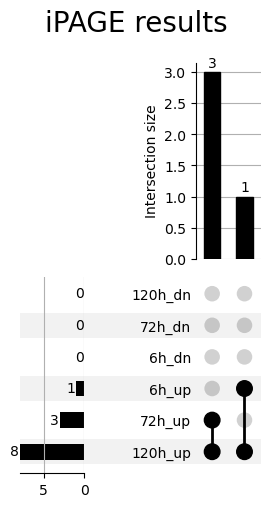

In [270]:
fig1 = plt.figure()
upset1 = us.UpSet(
    us.from_contents(data),
    # min_subset_size=5,
    min_degree=2,
    # max_degree=3,
    orientation='horizontal',show_counts=True,
)
# upset1.style_subsets(present='hl60_72h_only',edgecolor="red",linewidth=2)
upset1.plot(fig=fig1)
fig1.suptitle('iPAGE results',fontsize=20)
plt.show()
# pdf.savefig()

### AML CELL LINE PANEL

In [271]:
import seaborn as sns

In [272]:
# def draw_heatmap(df,vmin,vmax,x_label='',save=False):
#     plt.figure(figsize=(15, 20))
#     cg = sns.clustermap(df, method='average', metric='euclidean', col_cluster=False, row_cluster=False, figsize=None,
#                         cbar=True, cmap=plt.cm.RdBu_r, cbar_kws={'label': 'Over/Under-representation'}, 
#                         vmax=vmax,vmin=vmin
#                        )
#     plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='center')
#     cg.ax_heatmap.set_xlabel(x_label, fontdict={'fontsize': 10})
#     cg.ax_heatmap.set_title('Enrichments',
#                             fontdict={'fontsize': 13})
#     plt.tight_layout()
#     # fig, ax = plt.subplots(1, 1, figsize=(15, 20))
#     # sns.barplot(df.column, exp_['log2FoldChange'], color='purple')
#     # fig.patch.set_visible(False)
#     # ax.axis('off')
#     if save:
#         pass
#         # plt.savefig('enrichment_%s/regulon_enrichment_%s_%s.png' % (cat, comp, cat), dpi=500)

In [273]:
df = pd.concat(
    [pager.pvmat2bio_signal(pd.concat(cell_line_pws,axis=0),s,n_clust=n) for n in [1,2,3] for s in ['up','both','down']] 
).drop_duplicates()

df = df.reset_index()#.set_index(['level_1','level_0']).sort_index(0)
# df.index.names = [None,None]
df = df.rename(columns={'level_0':'line','level_1':'GO'})

In [286]:
df.sort_values(['GO','line']).set_index(['GO','line'])[10]

GO                                       line                   
GOBP_EOSINOPHIL_CHEMOTAXIS               hl60_120h_delta_exp        2.401
                                         hl60_72h_delta_exp         3.190
                                         hl60_72h_only_delta_exp    3.178
GOBP_GRANULOCYTE_CHEMOTAXIS              hl60_120h_delta_exp        6.477
                                         hl60_72h_delta_exp         3.251
                                         hl60_72h_only_delta_exp    3.623
                                         kg1_delta_exp              4.487
                                         molm14_delta_exp           3.223
                                         ociaml2_delta_exp          4.045
GOBP_MONOCYTE_CHEMOTAXIS                 hl60_120h_delta_exp        4.795
                                         hl60_72h_only_delta_exp    2.666
GOBP_NEGATIVE_CHEMOTAXIS                 hl60_120h_delta_exp        3.795
                                         hl60_6

In [291]:
for gs in set(df.GO):
    # pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

    l_72 = {
        g 
        for c in ["10"]
        for g in list(pager.bin_identifier_genes(f"exp/{study}/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
    }

    l_120 = {
        g 
        for c in ["10"]
        for g in list(pager.bin_identifier_genes(f"exp/{study}/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
    }

    print('","'.join(set(list(l_72) + list(l_120))))

IndexError: list index out of range

In [274]:
%reload_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
%%R 
library(ggplot2)
library(tidyverse)

In [753]:
%%R
library(pheatmap)
library(RColorBrewer)
library(viridis)

# makeColorRampPalette <- function(colors, cutoff.fraction, num.colors.in.palette)
# {
#   stopifnot(length(colors) == 4)
#   ramp1 <- colorRampPalette(colors[1:2])(num.colors.in.palette * cutoff.fraction)
#   ramp2 <- colorRampPalette(colors[3:4])(num.colors.in.palette * (1 - cutoff.fraction))
#   return(c(ramp1, ramp2))
# }

breaksList = seq(-3,3,by = 1)

In [825]:
%%R -i df
df %>% remove_rownames() %>%
    mutate(line=gsub("_delta_exp",'',line)) %>%
    mutate(line=gsub("_only",'',line)) %>%
    mutate(GO=gsub("GOBP_",'GOBP | ',GO)) %>%
    mutate(GO=gsub("GOMF_",'GOMF | ',GO)) %>%
    mutate(name=paste0(GO,'-',line)) %>%
    group_by(GO) %>% filter( n() > 1 ) %>% 
    column_to_rownames('name') -> df

In [826]:
%%R
mat_colors <- list(group = brewer.pal(7, "RdBu"))$group
greens <- brewer.pal(n = 4, name = "Greens")
set1 <- brewer.pal(n = 5, name = "Set1")
set2 <- c(brewer.pal(n = 16, name = "Set2"),brewer.pal(n = 16, name = "Set3"))

In [827]:
%%R 
go_col = c()
go_names = df$GO %>% unique

for (i in c(1:length(go_names))){
    go_col[go_names[i]]=set2[i]
}

In [828]:
%%R 
ann_colors = list(
    line = c(
        "hl60_6h"=greens[1],
        "hl60_72h"=greens[2],
        "hl60_120h"=greens[3],
        "kg1"=set1[1],
        "molm14"=set1[2],
        "ociaml3"=set1[4],
        "ociaml2"=set1[5]
    ),
    GO=go_col
)

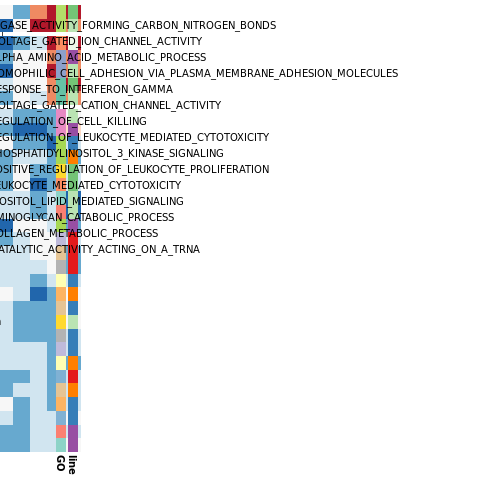

In [830]:
%%R
df %>% dplyr::select(-c(line,GO)) %>% 
    pheatmap(
        cluster_cols=F,
        cluster_rows=T,
        cutree_rows=3,
        show_rownames=F,
        show_colnames=F,
        vmin=-3,vmax=3,
        annotation_row = df %>%select(line,GO),
        color = mat_colors[length(mat_colors):-1:1],
        border_color = F,
        breaks = breaksList,
        annotation_colors = ann_colors
        
    ) -> pw_ht

In [832]:
%%R 
pdf("figures/cell-line-consistency-exp-GO.pdf",width=12, height=8)
grid::grid.newpage()
grid::grid.draw(pw_ht$gtable)

dev.off()

png 
  2 


In [84]:
# plt.figure(figsize=(8,8))

# # Make venn diagram                                                                                                                                                             
# v = venn3_unweighted(
#     [Exp_down,Rho_down,Hyper_m6A],('ΔRNA Expression\nlog2FC < -0.1','ΔPhenotype (ρ)\nlog2FC < -0.1','ΔRNA Methylation\nlog2FC > 1')
#     ,normalize_to=0.5
# )

# for x in ['100','010','001','110','101','011']:
#     v.get_patch_by_id(x).set_alpha(0.5)
#     v.get_patch_by_id(x).set_color('lightgrey')
#     v.get_label_by_id(x).set_fontsize(12)

# v.get_patch_by_id('111').set_color('y')
# v.get_label_by_id('111').set_fontsize(15)


# c = venn3_circles(
#     (1,1,1,1,1,1,1), linestyle='dashed'
#     ,normalize_to=0.5
# )
# for i,_ in enumerate(c):
#     c[i].set_lw(1.0)
#     c[i].set_ls('dotted')

# plt.title("Intersectional genes", fontsize=20)
# plt.annotate(
#     venn_genes_label, xy=v.get_label_by_id('111').get_position() - np.array([0, 0.05]), 
#     xytext=(-180,-250),
#     ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#     fontsize=12, 
#     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray')
# )

# plt.figtext(
#     0.5, 0.08, "pvalue < 0.05", ha="center", fontsize=10, 
#     bbox={"facecolor":"lightgray", "alpha":0.1, "pad":5}
# )

# plt.savefig('intersectional-genes/venn_plot_Exp_down_Rho_down_Hyper_m6A.pdf')
# plt.show()

___
# 

In [162]:
!date

Wed Oct 19 14:55:19 PDT 2022
